### ALL India Consumer Price (CPI) Analysis

---
`Introduction`

`Consumer Price Indices (CPI) measure changes over time in general level of prices of goods and services that households acquire for the purpose of consumption. CPI numbers are widely used as a macroeconomic indicator of inflation, as a tool by governments and central banks for inflation targeting and for monitoring price stability, and as deflators in the national accounts. CPI is also used for indexing dearness allowance to employees for increase in prices. CPI is therefore considered as one of the most important economic indicators. For construction of CPI numbers, two requisite components are weighting diagrams (consumption patterns) and price data collected at regular intervals. The data refers to group wise all India Consumer Price Index for Rural & Urban with base year 2010. The dataset is published by Central Statistical Office and released on 12th of every month`





**A Snapshot Of our Dataset**

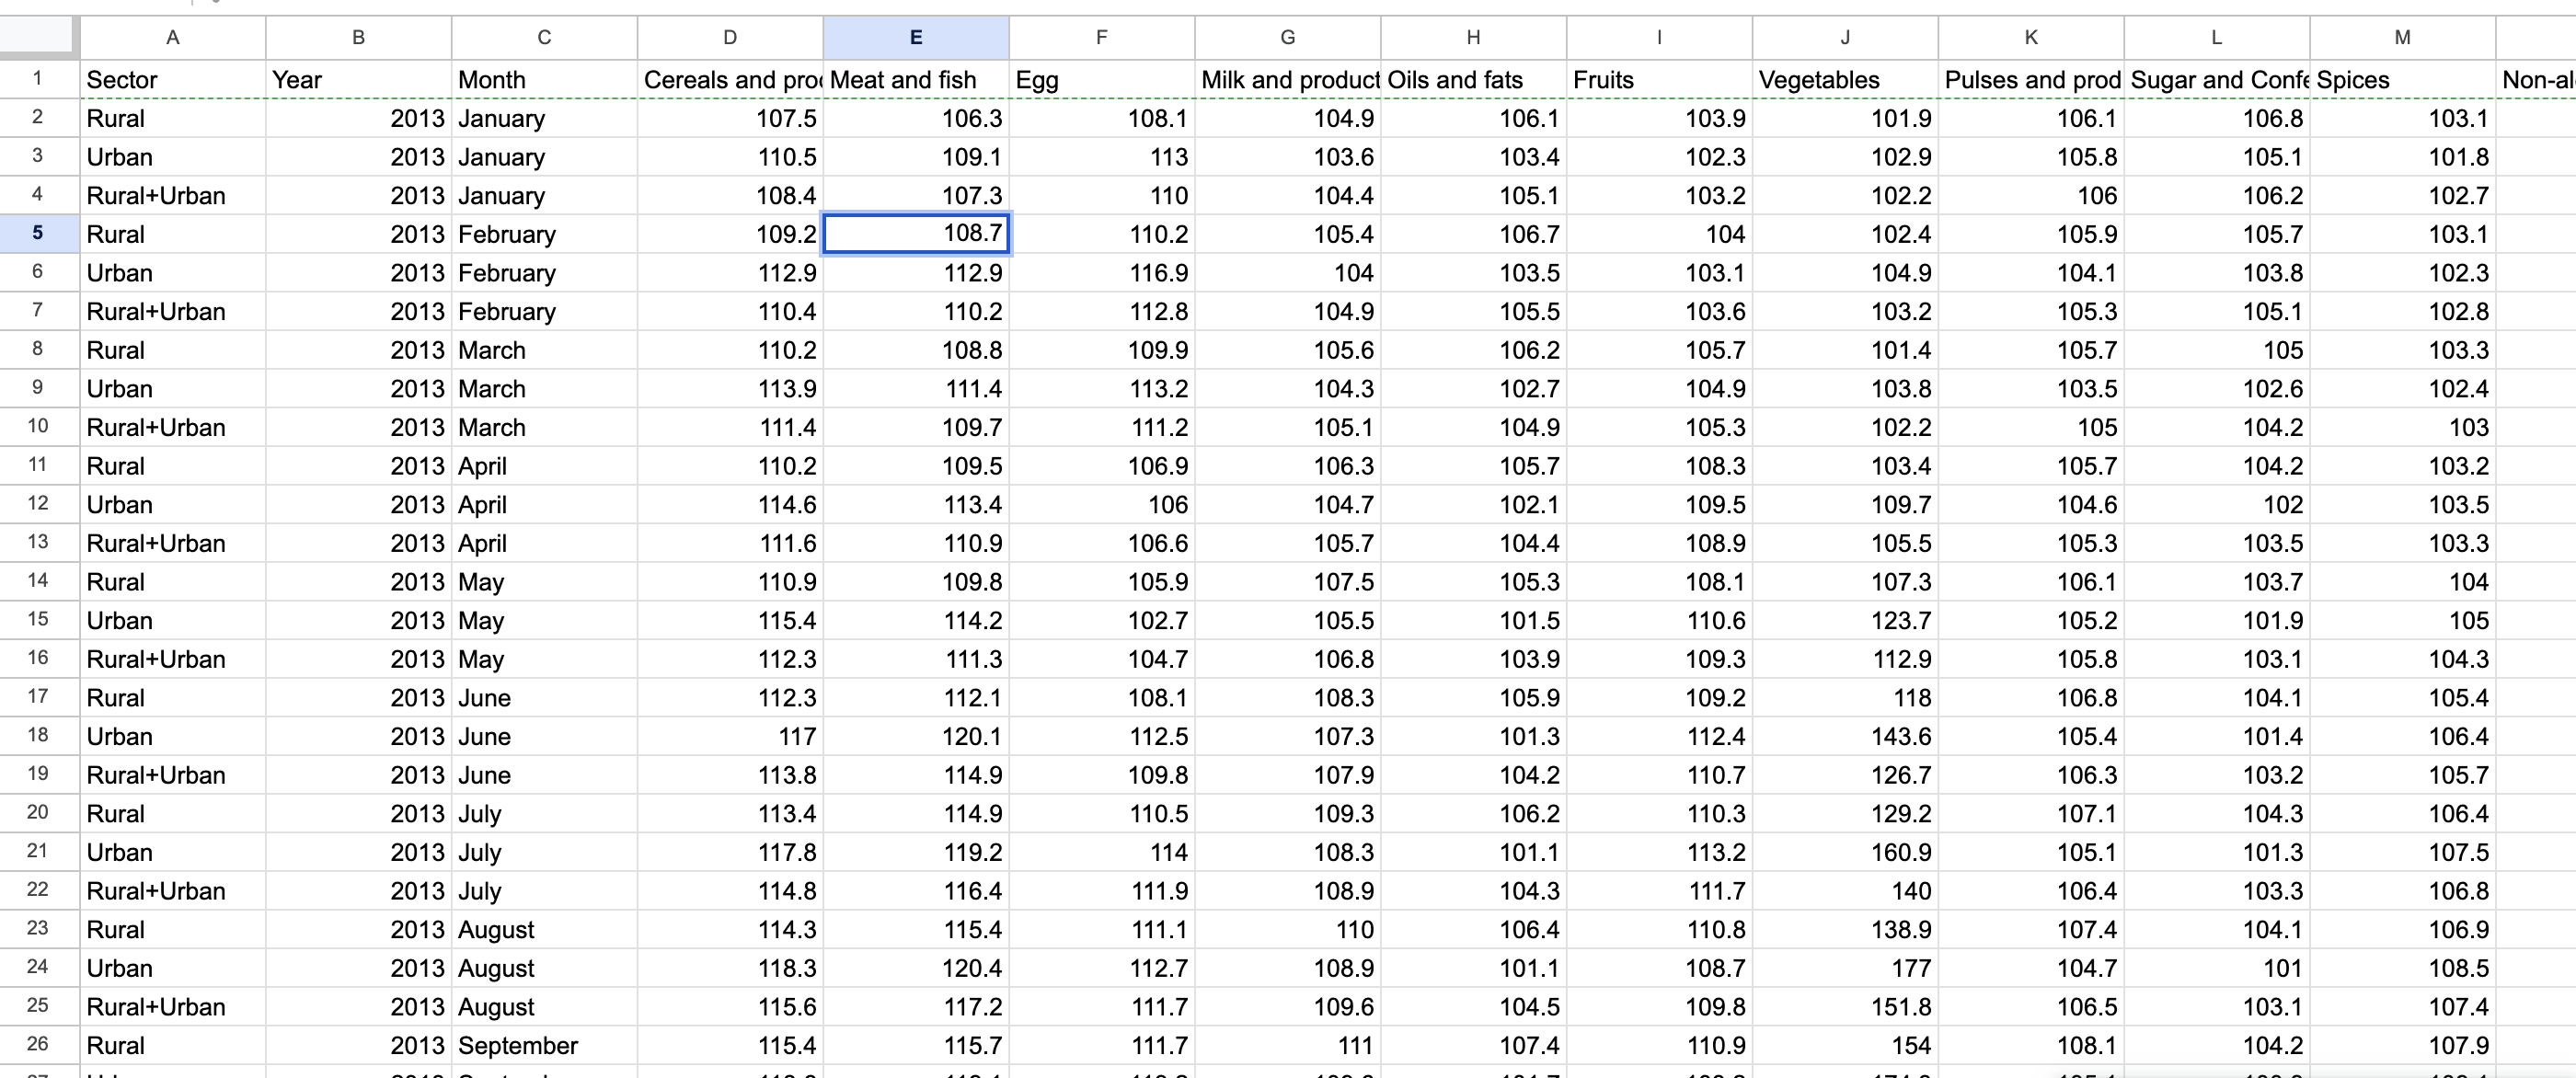

In [ ]:
import pandas as pd

df = pd.read_csv('cpi.csv')
df.head()

,Sector,Year,Month,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,...,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
0,Rural,2013,January,107.5,106.3,108.1,104.9,106.1,103.9,101.9,...,NaN,105.5,104.8,104.0,103.3,103.4,103.8,104.7,104.0,105.1
1,Urban,2013,January,110.5,109.1,113.0,103.6,103.4,102.3,102.9,...,100.3,105.4,104.8,104.1,103.2,102.9,103.5,104.3,103.7,104.0
2,Rural+Urban,2013,January,108.4,107.3,110.0,104.4,105.1,103.2,102.2,...,100.3,105.5,104.8,104.0,103.2,103.1,103.6,104.5,103.9,104.6
3,Rural,2013,February,109.2,108.7,110.2,105.4,106.7,104.0,102.4,...,NaN,106.2,105.2,104.4,103.9,104.0,104.1,104.6,104.4,105.8
4,Urban,2013,February,112.9,112.9,116.9,104.0,103.5,103.1,104.9,...,100.4,105.7,105.2,104.7,104.4,103.3,103.7,104.3,104.3,104.7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Sector                               390 non-null    object 
 1   Year                                 390 non-null    int64  
 2   Month                                390 non-null    object 
 3   Cereals and products                 387 non-null    float64
 4   Meat and fish                        384 non-null    float64
 5   Egg                                  387 non-null    float64
 6   Milk and products                    387 non-null    float64
 7   Oils and fats                        387 non-null    float64
 8   Fruits                               387 non-null    float64
 9   Vegetables                           387 non-null    float64
 10  Pulses and products                  387 non-null    float64
 11  Sugar and Confectionery         

In [ ]:

print(df.isnull().sum())
missing_percentage = (df.isnull().sum().sum() / df.size) * 100
print(f'missing_percentage = ', missing_percentage)


Sector                                   0
Year                                     0
Month                                    0
Cereals and products                     3
Meat and fish                            6
Egg                                      3
Milk and products                        3
Oils and fats                            3
Fruits                                   3
Vegetables                               3
Pulses and products                      3
Sugar and Confectionery                  3
Spices                                   3
Non-alcoholic beverages                  3
Prepared meals, snacks, sweets etc.      6
Food and beverages                       3
Pan, tobacco and intoxicants             6
Clothing                                 6
Footwear                                 6
Clothing and footwear                    6
Housing                                122
Fuel and light                           3
Household goods and services             6
Health     

# CPI Data Summary

## 1. Overview
- **Total Rows:** 390
- **Total Columns:** 30
- **Missing Values:** [Enter the count of missing values]

## 2. Missing Data
- **Columns with Most Missing Values:** Housing
- **Percentage of Missing Values:** 61% of the Data is missing

## 3. Main Columns of Interest
- **Sector**: Identifies the sector (Rural, Urban, Rural+Urban).
- **Year**: The year the data was recorded.
- **Month**: The month of the data.
- **Cereals and prod**: Index for cereals and related products.
- **Fruits**: Index for fruits.
- **Vegetables**: Index for vegetables.
- **Pulses and prod**: Index for pulses and related products.
- **Sugar and Confectionery**: Index for sugar and confectionery items.
- **Oils and fats**: Index for oils and fats.
- **Egg**: Index for eggs.
- **Meat and fish**: Index for meat and fish products.
- **Spices**: Index for spices.



# Data Cleaning and Preprocessing

In [ ]:
missing_values = df.isnull().sum().sum()
total_cells = df.size
missing_percentage = (missing_values / total_cells) * 100
print(f'Total missing values: {missing_values}')
print(f'Total cells: {total_cells}')
print(f'Percentage of missing values: {missing_percentage:.2f}%')

Total missing values: 239
Total cells: 11700
Percentage of missing values: 2.04%


In [ ]:
#filling all the columns with numeric data with their mean

numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

In [ ]:
from sklearn.preprocessing import MinMaxScaler


numerical_columns = df.select_dtypes(include=['number']).columns


scaler = MinMaxScaler(feature_range=(0, 100))


df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Since df is already updated, there's no need for scaled_df.
# You can now just inspect the DataFrame itself
print(df.head())


        Sector  Year     Month  Cereals and products  Meat and fish  \
0        Rural   0.0   January              0.000000       0.000000   
1        Urban   0.0   January              3.880983       2.327515   
2  Rural+Urban   0.0   January              1.164295       0.831255   
3        Rural   0.0  February              2.199224       1.995012   
4        Urban   0.0  February              6.985770       5.486284   

         Egg  Milk and products  Oils and fats    Fruits  Vegetables  ...  \
0   5.726405           1.651842       4.595588  1.895735    0.257865  ...   
1  10.922587           0.000000       2.113971  0.000000    0.773595  ...   
2   7.741251           1.016518       3.676471  1.066351    0.412584  ...   
3   7.953340           2.287166       5.147059  2.014218    0.515730  ...   
4  15.058324           0.508259       2.205882  0.947867    1.805054  ...   

   Housing  Fuel and light  Household goods and services    Health  \
0      NaN        0.121951              

In [ ]:


import pandas as pd
from sklearn.preprocessing import MinMaxScaler


scaled_df = df.copy()


numerical_columns = scaled_df.select_dtypes(include=['number']).columns


scaler = MinMaxScaler(feature_range=(0, 100))


scaled_df[numerical_columns] = scaler.fit_transform(scaled_df[numerical_columns])


scaled_df.head()


,Sector,Year,Month,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,...,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
0,Rural,0.0,January,0.000000,0.000000,5.726405,1.651842,4.595588,1.895735,0.257865,...,NaN,0.121951,0.000000,0.000000,0.145985,0.680272,0.367197,3.030303,0.380711,1.306413
1,Urban,0.0,January,3.880983,2.327515,10.922587,0.000000,2.113971,0.000000,0.773595,...,100.3,0.000000,0.000000,0.113766,0.000000,0.000000,0.000000,2.564103,0.000000,0.000000
2,Rural+Urban,0.0,January,1.164295,0.831255,7.741251,1.016518,3.676471,1.066351,0.412584,...,100.3,0.121951,0.000000,0.000000,0.000000,0.272109,0.122399,2.797203,0.253807,0.712589
3,Rural,0.0,February,2.199224,1.995012,7.953340,2.287166,5.147059,2.014218,0.515730,...,NaN,0.975610,0.518135,0.455063,1.021898,1.496599,0.734394,2.913753,0.888325,2.137767
4,Urban,0.0,February,6.985770,5.486284,15.058324,0.508259,2.205882,0.947867,1.805054,...,100.4,0.365854,0.518135,0.796359,1.751825,0.544218,0.244798,2.564103,0.761421,0.831354


In [ ]:
# Separating Rural and Urban
rural_df = df[df['Sector'] == 'Rural']
urban_df = df[df['Sector'] == 'Urban']
rural_urban_df = df[df['Sector'] == 'Rural+Urban']

In [ ]:
#saving the cleaned data
df.to_csv('cleaned_cpi_data.csv', index=False)

# Exploratory Data Analysis

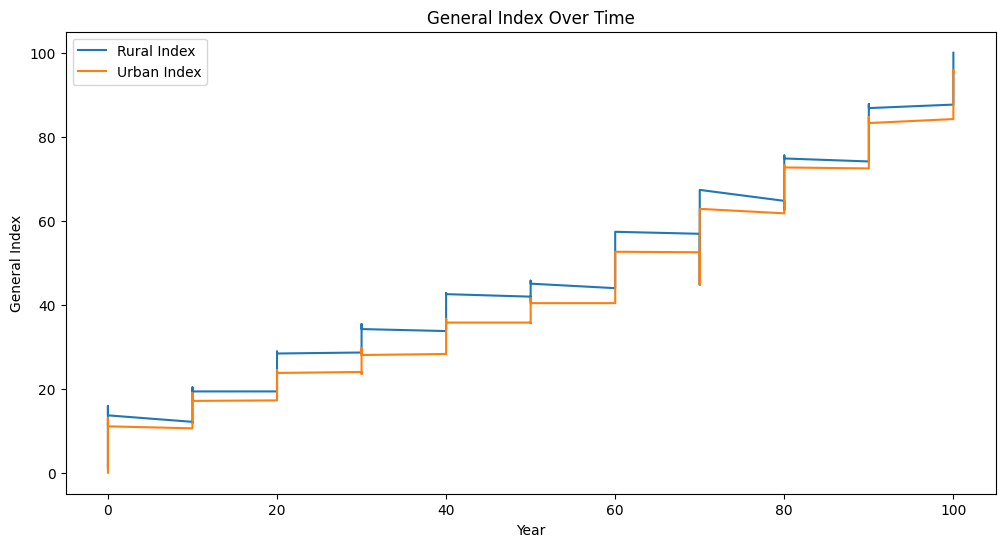

,Sector,Year,Month,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,...,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
0,Rural,0.0,January,0.000000,0.000000,5.726405,1.651842,4.595588,1.895735,0.257865,...,NaN,0.121951,0.000000,0.000000,0.145985,0.680272,0.367197,3.030303,0.380711,1.306413
1,Urban,0.0,January,3.880983,2.327515,10.922587,0.000000,2.113971,0.000000,0.773595,...,100.3,0.000000,0.000000,0.113766,0.000000,0.000000,0.000000,2.564103,0.000000,0.000000
2,Rural+Urban,0.0,January,1.164295,0.831255,7.741251,1.016518,3.676471,1.066351,0.412584,...,100.3,0.121951,0.000000,0.000000,0.000000,0.272109,0.122399,2.797203,0.253807,0.712589
3,Rural,0.0,February,2.199224,1.995012,7.953340,2.287166,5.147059,2.014218,0.515730,...,NaN,0.975610,0.518135,0.455063,1.021898,1.496599,0.734394,2.913753,0.888325,2.137767
4,Urban,0.0,February,6.985770,5.486284,15.058324,0.508259,2.205882,0.947867,1.805054,...,100.4,0.365854,0.518135,0.796359,1.751825,0.544218,0.244798,2.564103,0.761421,0.831354


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
# plt.plot(df['Year'],df['General index'], label = 'General Index')
plt.plot(rural_df['Year'], rural_df['General index'], label = 'Rural Index')
plt.plot(urban_df['Year'], urban_df['General index'], label = 'Urban Index')
plt.xlabel('Year')
plt.ylabel('General Index')
plt.title('General Index Over Time')
plt.legend()
plt.show()
df.head()

#Visualizations

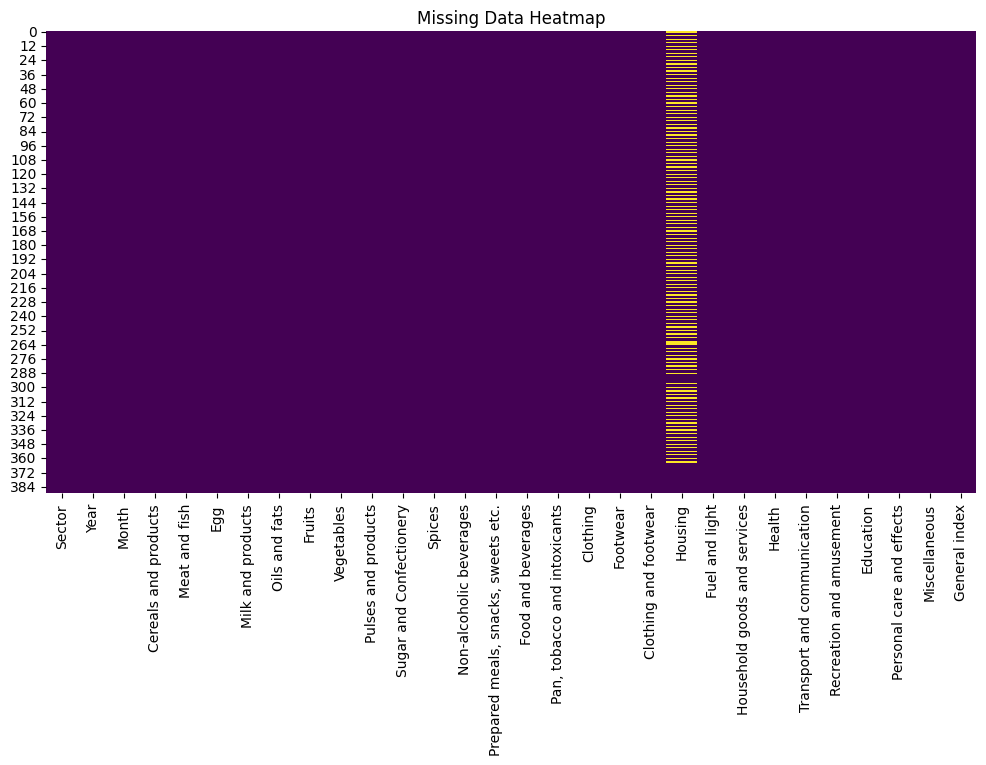

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

copy_df = pd.read_csv('cpi.csv')

plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

**Time Series Analysis : CPI Index over time**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Sector                               390 non-null    object 
 1   Year                                 390 non-null    float64
 2   Month                                390 non-null    object 
 3   Cereals and products                 390 non-null    float64
 4   Meat and fish                        390 non-null    float64
 5   Egg                                  390 non-null    float64
 6   Milk and products                    390 non-null    float64
 7   Oils and fats                        390 non-null    float64
 8   Fruits                               390 non-null    float64
 9   Vegetables                           390 non-null    float64
 10  Pulses and products                  390 non-null    float64
 11  Sugar and Confectionery         

In [ ]:
# Fix the Month column if there are any typos
df['Month'] = df['Month'].replace({'Marcrh': 'March', 'January 0.0': 'January'})  # Add any other necessary replacements

# Create a new 'Date' column by combining 'Month' and 'Year'
df['Date'] = pd.to_datetime(df['Month'] + ' ' + df['Year'].astype(str), format='%B %Y', errors='coerce')

# Check if the 'Date' column is created
print(df.head())  # Display the first few rows again
print(df.columns)  # Confirm 'Date' is in the columns


                 Sector  Year     Month  Cereals and products  Meat and fish  \
Date                                                                           
2013-01-01        Rural  2013   January                 107.5          106.3   
2013-01-01        Urban  2013   January                 110.5          109.1   
2013-01-01  Rural+Urban  2013   January                 108.4          107.3   
2013-02-01        Rural  2013  February                 109.2          108.7   
2013-02-01        Urban  2013  February                 112.9          112.9   

              Egg  Milk and products  Oils and fats  Fruits  Vegetables  ...  \
Date                                                                     ...   
2013-01-01  108.1              104.9          106.1   103.9       101.9  ...   
2013-01-01  113.0              103.6          103.4   102.3       102.9  ...   
2013-01-01  110.0              104.4          105.1   103.2       102.2  ...   
2013-02-01  110.2              105.4   

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('cpi.csv')

# Display the DataFrame info to check data types and missing values
print(df.info())

# Fix any known issues in the Month column (replace typos, etc.)
df['Month'] = df['Month'].replace({'Marcrh': 'March', 'January 0.0': 'January'})

# Convert the 'Year' column to string to ensure concatenation
df['Year'] = df['Year'].astype(str)

# Create a new Date column by combining Month and Year
df['Date'] = df['Month'] + ' ' + df['Year']

# Convert to datetime format, coercing errors
df['Date'] = pd.to_datetime(df['Date'], format='%B %Y', errors='coerce')

# Check for any NaN values in the Date column
if df['Date'].isnull().any():
    print("Rows with invalid dates:")
    print(df[df['Date'].isnull()])

# Drop rows with NaN in the Date column
df.dropna(subset=['Date'], inplace=True)

# Set the new Date column as the index
df.set_index('Date', inplace=True)

# Ensure numeric values in relevant columns and convert them
for column in df.columns[3:]:  # Skip the first three columns (Sector, Year, Month)
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Drop columns that are entirely NaN
df.dropna(axis=1, how='all', inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Sector                               390 non-null    object 
 1   Year                                 390 non-null    int64  
 2   Month                                390 non-null    object 
 3   Cereals and products                 387 non-null    float64
 4   Meat and fish                        384 non-null    float64
 5   Egg                                  387 non-null    float64
 6   Milk and products                    387 non-null    float64
 7   Oils and fats                        387 non-null    float64
 8   Fruits                               387 non-null    float64
 9   Vegetables                           387 non-null    float64
 10  Pulses and products                  387 non-null    float64
 11  Sugar and Confectionery         

In [ ]:
# Reshape the DataFrame to a long format
df_long = df.melt(id_vars=['Sector', 'Year'], var_name='Category', value_name='CPI')

# Display the reshaped DataFrame
print(df_long.head())


        Sector  Year Category       CPI
0        Rural  2013    Month   January
1        Urban  2013    Month   January
2  Rural+Urban  2013    Month   January
3        Rural  2013    Month  February
4        Urban  2013    Month  February


In [ ]:

plt.figure(figsize=(16, 8))

categories_to_plot = df_long['Category'].unique()[:10]

for category in categories_to_plot:
    subset = df_long[df_long['Category'] == category]
    plt.plot(subset['Date'], subset['CPI'], label=category)

plt.title('CPI Trends Over Time for Selected Categories')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


KeyError: 'Date'

<Figure size 1600x800 with 0 Axes>